<a href="https://colab.research.google.com/github/Kgitahi/karengitahi.github.io/blob/main/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Define Tickers and Time Range

In [3]:
tickers = ['SPY','BND','GLD','QQQ','VTI']

In [6]:
from datetime import datetime, timedelta
end_date = datetime.today()

In [11]:
start_date = end_date - timedelta(days = 5*365)
print(start_date)

2019-04-10 19:59:49.798555


##Download Adjusted Close Prices

In [15]:
import pandas as pd
import yfinance as yf

adj_close_df = pd.DataFrame() #Creating an empty dataframe to store the adjusted closing price
for ticker in tickers: #Download the closing price for each ticker
    data = yf.download(ticker, start = start_date,end = end_date)
    adj_close_df[ticker] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [18]:
#check the data
print(adj_close_df)

                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2019-04-10  266.022095  71.006577  123.529999  179.553192  136.361847
2019-04-11  265.948242  70.883667  121.949997  179.127243  136.352615
2019-04-12  267.747589  70.751976  121.830002  179.901703  137.266602
2019-04-15  267.572235  70.769562  121.599998  179.930817  137.155853
2019-04-16  267.747589  70.646622  120.510002  180.550369  137.192780
...                ...        ...         ...         ...         ...
2024-04-02  518.840027  71.839996  210.889999  441.109985  257.299988
2024-04-03  519.409973  71.889999  212.740005  442.100006  257.700012
2024-04-04  513.070007  72.040001  211.520004  435.339996  254.610001
2024-04-05  518.429993  71.680000  215.139999  440.470001  257.179993
2024-04-08  518.669983  71.620003  216.500000  440.600006  257.459991

[1257 rows x 5 columns]


##Calculate Lognormal Returns

In [20]:
import numpy as np

#calculate the lognormal returns - has a more symetric distribution and make sure that we don't return negative values
log_returns_df = np.log(adj_close_df) / adj_close_df.shift(1)

In [23]:
#Drop missing values
log_returns = log_returns_df.dropna()

In [24]:
print(log_returns)

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2019-04-11  0.020988  0.060009  0.038886  0.028894  0.036046
2019-04-12  0.021019  0.060087  0.039382  0.028987  0.036097
2019-04-15  0.020876  0.060202  0.039405  0.028863  0.035851
2019-04-16  0.020892  0.060163  0.039406  0.028878  0.035882
2019-04-17  0.020869  0.060267  0.039746  0.028798  0.035845
...              ...       ...       ...       ...       ...
2024-04-02  0.011973  0.059433  0.025750  0.013685  0.021372
2024-04-03  0.012051  0.059509  0.025416  0.013810  0.021577
2024-04-04  0.012014  0.059497  0.025168  0.013744  0.021497
2024-04-05  0.012183  0.059303  0.025394  0.013984  0.021797
2024-04-08  0.012058  0.059589  0.024996  0.013822  0.021584

[1256 rows x 5 columns]


##Calculating the Covariance matrix
- Helps to calculate std or risk in the most optimal way

In [26]:
cov_matrix = log_returns.cov() * 252 #used annualized log returns above
print(cov_matrix)

          SPY       BND       GLD       QQQ       VTI
SPY  0.001835 -0.000358  0.001457  0.002938  0.003064
BND -0.000358  0.001595  0.000052 -0.000111 -0.000456
GLD  0.001457  0.000052  0.002040  0.002718  0.002389
QQQ  0.002938 -0.000111  0.002718  0.005070  0.004922
VTI  0.003064 -0.000456  0.002389  0.004922  0.005143


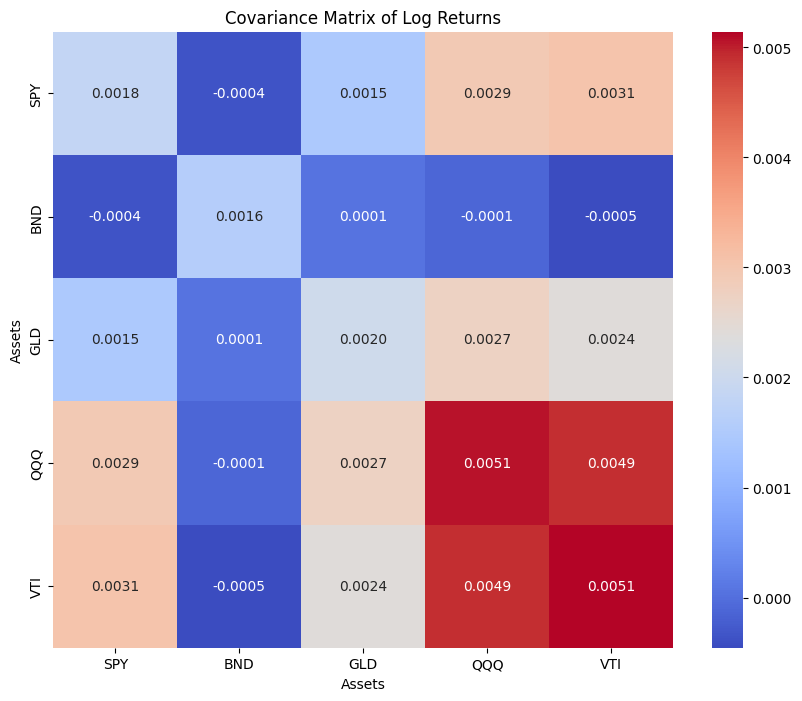

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot covariance matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Covariance Matrix of Log Returns')
plt.xlabel('Assets')
plt.ylabel('Assets')
plt.show()

#Analysis of the matrix
- High variance indicates higher volatility in the asset's returns. For instance, SPY has a variance of 0.0018, which needs to be compared with other variances to understand its volatility relative to them.


    1. High Covariance between QQQ and VTI (0.0051): This is the highest positive covariance in the matrix, suggesting that these two assets, often tech-heavy indices, move very similarly. This implies they might not provide good diversification benefits when paired together in a portfolio.

    2. Variance of Each Asset: The diagonal elements tell us the individual asset volatilities. For example, VTI has the highest individual variance (0.0051), indicating it is the most volatile of the assets listed. Conversely, BND shows the lowest variance (0.0016), suggesting it is the least volatile, which is typical for bonds compared to stocks.

    3. Negative Covariance between SPY and BND (-0.0004): This suggests that the S&P 500 index and the bond market represented by BND tend to move in opposite directions, albeit the relationship is very weak. This is important for diversification since combining these could potentially lower portfolio volatility.

    4. Positive Covariance between GLD and other Assets: GLD (typically representing gold) has a positive but small covariance with other assets, like SPY (0.0015) and QQQ (0.0027), which means it somewhat moves in the same direction as these assets, but the strength of the movement together is not strong.

    5. Overall Diversification: Looking at the color coding, we see that no assets have a strong negative covariance, indicating there aren't any pairs of assets that are strongly inversely related. However, there are assets with low covariance, such as GLD with BND (0.0001), suggesting some level of diversification potential.


##Portfolio Perfomance Metrics

In [31]:
#Calculating portfolio variance
# - This is a measure of risk associated with portfolio assets
# - It represents the combined volaitility of assets taking into account their individual volaitility in correlation with each other

def standard_deviation(weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

In [32]:
#Calculating the expected return
# - Expected returns are based on historical values ~ Key Assuption*

def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)*252

In [35]:
# Sharpe ratio
 # Portfolio return = ((the expected return - risk free rate)/std)

def sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return (expected_return(weights, log_returns) - risk_free_rate) / standard_deviation(weights, cov_matrix)

In [39]:
!pip install fredapi


In [41]:
from fredapi import Fred

# Replace 'your_api_key' with your actual FRED API key
fred = Fred(api_key=('3105a420b0d710eda9fe5dfafacb603b'))
ten_year_treasury_rate = fred.get_series_latest_release('GS10') / 100

# Set the risk-free rate
risk_free_rate = ten_year_treasury_rate.iloc[-1]
print(risk_free_rate)


0.0421
